# Running a Classification Tree

In [19]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns  # for plots
import matplotlib.pyplot as plt  # as plt is sort of a nickname for the library because it is too long.
import statsmodels.formula.api as smf  # statsmodels
import statsmodels.stats.multicomp as multi  # statsmodels and posthoc test
import statsmodels.api as sm  # Statsmodel for the qqplots
import scipy.stats  # For the Chi-Square test of independance

# to prevent the depreciation warning of the datetools of pandas
from pandas.core import datetools

# 
import os 

# Machine learning
# Libraries for decision trees

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# For the decision tree
import graphviz

In [20]:
# Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
# Set PANDAS to show all rows in DataFrame
pd.set_option('display.max_rows', None)

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [21]:
# Importing the data set
df = pd.read_csv("ool_pds.csv", low_memory = False)

### Research question and variables
In this part of the analysis, we provide description of our explanatory and response variables measured, the response scales and the data management decisions that we have made.

** Our research question is: “To what extent is the perception of the US economic situation associated with the level of income?” **

To answer the question, we will use these variables from the data set:

** a) Explanatory variable (X):**
- W1_P20: is the Personal Annual income (which is a categorical ordinal variable with 20 levels of response);

** b) Response variable (Y):**
- W1_G2: is the US economy’s situation (which is a categorical variable with the values coded for “Better”, “About the same”, “Worse”);
- W1_F1: is the Perception of how the respondents think about the future (this is also a categorical variable with a tree point scale: “Optimistic”, “Neither”, “Pessimistic”);

** c) Moderating variable :**
- W1_A1: measures the level of interest in politics. This variable is also a categorical variable with a five-point Scales (“Extremely interested”, “Very interested”, “Moderately interested”, “Slightly interested”, “Not interested at all”).

## Running a Classification Tree

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

_Note: like an algorithm -> 1) use a subset of the observation = training set ; 2) test the statistical model we got from the training set on a different set of observation; 3) this is because the model that is fit using a machine learning approch will best fit in the dataset it was developped, but it might not perform as well when we try to test it in a different set of observations._

For more information on decision trees : 
https://clearpredictions.com/Home/DecisionTree

### Building a Decision Tree with Python

In [22]:
# This is for the machine learning with sklearn
# To indicate where the data set is located:
os.chdir("/Users/annick/OneDrive/Documents/2. Data analysis and research/1. Data_Analysis_and_Interpretation/0. Python_Working_Directory")

# Because decision tree analyses cannot handle any NA's in our data set,
# The next step is to create a clean data frame that drops all NA's.
# Importing the data set:

df = pd.read_csv("ool_pds.csv", low_memory=False)

In [23]:
# Let's do a bit of data management on the variables that we will be working with
df["W1_P20"] = df["W1_P20"].replace(-1, np.nan)
df["W1_G2"] = df["W1_G2"].replace(-1, np.nan)
df["W1_F1"] = df["W1_F1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(998, np.nan)
df["W1_A12"] = df["W1_A12"].replace(-1, np.nan)
df["W1_C1"] = df["W1_C1"].replace(-1, np.nan)
df["W1_A1"] = df["W1_A1"].replace(-1, np.nan)
df["W1_M1"] = df["W1_M1"].replace(-1, np.nan)
df["W1_P11"] = df["W1_P11"].replace(-1, np.nan)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 436 entries, CASEID to PPNET
dtypes: float64(12), int64(229), object(195)
memory usage: 7.6+ MB


In [25]:
"""
Running a Classification Tree.
We will need to perform a decision tree analysis to test nonlinear relationships 
among a series of explanatory variables and a binary, categorical response variable.

"""

def economy_situation(row):
    if row["W1_G2"] == 1:
        return 1
    if row["W1_G2"] == 2:
        return 0
    if row["W1_G2"] == 3:
        return 0
# This variable is then added to the dataframe
df["economy_situation"] = df.apply(lambda row: economy_situation(row), axis=1)
#%%
df["economy_situation"] = df["economy_situation"].astype("category")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 437 entries, CASEID to economy_situation
dtypes: category(1), float64(12), int64(229), object(195)
memory usage: 7.6+ MB


Setting the new data frame called 'df_clean', I can now take a look at various characteristics of the data by using the "dtypes" and "describe" functions to examine data types and summary statistics.

In [27]:
df_clean = df.dropna()

In [28]:
print("This is the counts for the economy_situation : 1 = Better, 0 = Worse")
count_economy_situation = pd.crosstab(index=df["economy_situation"], columns="counts")
print(count_economy_situation)

This is the counts for the economy_situation : 1 = Better, 0 = Worse
col_0              counts
economy_situation        
0.000000             1698
1.000000              545


In [29]:
df_clean.describe()

,CASEID,W1_CASEID,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W1_A1,W1_A2,W1_A4,W1_A10,W1_A11,W1_A12,W1_B1,W1_B2,W1_B3,W1_B4,W1_C1,W1_C2,W1_D1,W1_D2,W1_D3,W1_D4,W1_D5,W1_D6,W1_D7,W1_D8,W1_D9,W1_D10,W1_D11,W1_D12,W1_D13,W1_D14,W1_D15,W1_D16,W1_D17,W1_D18,W1_D19,W1_D20,W1_E1,W1_E3,W1_E61_A,W1_E61_B,W1_E61_C,W1_E61_D,W1_E62_A,W1_E62_B,W1_E62_C,W1_E62_D,W1_E63_A,W1_E63_B,W1_E63_C,W1_E63_D,W1_E64_A,W1_E64_B,W1_E64_C,W1_E64_D,W1_E7,W1_E9_A,W1_E9_B,W1_E9_C,W1_E9_D,W1_E9_REFUSED,W1_F1,W1_F2,W1_F3,W1_F4_A,W1_F4_B,W1_F4_C,W1_F4_D,W1_F4_E,W1_F5_A,W1_F5_B,W1_F5_C,W1_F5_D,W1_F5_E,W1_F6,W1_G2,W1_G3A,W1_H1,W1_H2,W1_H3,W1_H4,W1_H5,W1_H6,W1_H7,W1_H8,W1_I1,W1_I2,W1_J1_A,W1_J1_B,W1_J1_C,W1_J1_D,W1_J1_E,W1_J1_F,W1_J1_G,W1_J2,W1_J3A_A,W1_J3A_B,W1_J3A_C,W1_K1_A,W1_K1_B,W1_K1_C,W1_K1_D,W1_K4,W1_K5,W1_L1_A,W1_L1_B,W1_L1_C,W1_L2_1,W1_L2_2,W1_L2_3,W1_L2_4,W1_L2_5,W1_L2_REFUSED,W1_L3,W1_L4_A,W1_L4_B,W1_L4_C,W1_L4_D,W1_L5_A,W1_L5_B,W1_L5_C,W1_L5_D,W1_L5_E,W1_L5_F,W1_M1,W1_M1A,W1_M5,W1_M3,W1_M4,W1_N1A,W1_N1B,W1_N1C,W1_N1D,W1_N1E,W1_N1F,W1_N1G,W1_N1H,W1_N1I,W1_N1J,W1_N1K,W1_N1L,W1_N1M,W1_N1N,W1_O1,W1_O3,W1_O4,W1_O5,W1_P2,W1_P3,W1_P4,W1_P5,W1_P5A,W1_P6,W1_P8,W1_P9,W1_P10,W1_P11,W1_P13,W1_P14,W1_P15,W1_P16A,W1_P16B,W1_P16C,W1_P16D,W1_P16E,W1_P16F,W1_P16G,W1_P16H,W1_P16I,W1_P16J,W1_P16K,W1_P16L,W1_P16M,W1_P16_REFUSED,W1_P17,W1_P20,W1_P21,W1_ORDER_Q1,W1_Q1_A,W1_Q1_B,W1_ORDER_M13,W1_ORDER_A1,W1_ORDER_A2,W1_ORDER_A12,W1_ORDER_B1,W1_ORDER_B2,W1_ORDER_B3,W1_ORDER_B4,W1_ORDER_C2,W1_ORDER_E2,W1_ORDER_E2A,W1_ORDER_F1,W1_ORDER_F1A,W1_ORDER_F2,W1_ORDER_F2A,W1_ORDER_F3,W1_ORDER_F4,W1_ORDER_F5,W1_ORDER_G2,W1_ORDER_G3A,W1_ORDER_H1,W1_ORDER_I1,W1_ORDER_J1,W1_ORDER_J3A,W1_ORDER_K1,W1_ORDER_L4_A,W1_ORDER_L4_B,W1_ORDER_L4_C,W1_ORDER_L4_D,W1_ORDER_L5_A,W1_ORDER_L5_B,W1_ORDER_L5_C,W1_ORDER_L5_D,W1_ORDER_L5_E,W1_ORDER_L5_F,W1_ORDER_M3,W1_ORDER_O1,PPAGE,PPAGECAT,PPAGECT4,PPEDUC,PPEDUCAT,PPETHM,PPGENDER,PPHHHEAD,PPHHSIZE,PPHOUSE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1

Next, we need to set our explanatory (X) and response or target variables (Y); and then include the train test split function for predictors and target.

In [30]:
# W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
# The variables and name the count column
print("W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?")
w1c1 = pd.crosstab(index = df["W1_C1"], columns = "counts")
print(w1c1)

print("")
print("W1_A1 How interested are you in what’s going on in government and politics?")
w1a1 = pd.crosstab(index = df["W1_A1"], columns = "counts")
print(w1a1)

W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
col_0     counts
W1_C1           
1.000000     331
2.000000    1251
3.000000     555
4.000000     108

W1_A1 How interested are you in what’s going on in government and politics?
col_0     counts
W1_A1           
1.000000     389
2.000000     679
3.000000     658
4.000000     354
5.000000     198


In [31]:
# 1) The predictors are the interest in politics and self identification to a political party's philosophy
predictors = df_clean[["W1_A1" ,"W1_C1"]]
targets = df_clean.economy_situation  # ==> accuracy_score = 0.749 or 0.77 in a other attempt?!

In [32]:
# 2) Split into training and testing sets


# And then include the train test split function for predictors and target.
# And set the size ratio to 60 % for the training sample and 40% for the test sample 
# by indicating test_size=.4. 

# I'll do a 50/50 split of the sample

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size= 0.4)
# 3) Here I request the shape of these predictor and target training and
# test samples.

# This is the training sample : observations (% of the ratio of our original sample, and nb of explanatory variables")
print("Training sample : observations and explanatory variables")
print(pred_train.shape)

print("The test sample : observations and explanatory variables")
print(pred_test.shape)

# Note that the total should give you the sample size, since whe decided to plit the sample into
# 0.4 for the test sample and 0.6 for the training sample
# Test it by doing len(df) lenght of the dataset

Training sample : observations and explanatory variables
(1161, 2)
The test sample : observations and explanatory variables
(774, 2)


In [33]:
#%%
tar_train.shape
#%%
tar_test.shape
#%%

# Build the decision tree classifier model on training data
classifier = DecisionTreeClassifier()
#%%
# We Then use this classifier.fit function which we pass the training predictors and
# training targets to
classifier = classifier.fit(pred_train,tar_train)
#%%
# Next we include the predict function where we predict for the test values
predictions = classifier.predict(pred_test)
#%%


In [34]:
# then call in the confusion matrix function which we passed the target test sample to.
# This shows the correct and incorrect classifications of our decision tree.
# To check if the result make sence, at least, we should have the same number of labels of the 
# target variable, hase we have of columns

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[588,   0],
       [186,   0]])

In [35]:
# We can also look at the accuracy score which is approximately 0.74,
# which suggests that the decision tree model has classified 74 %

print("This is the accuracy score of the classification model :")
sklearn.metrics.accuracy_score(tar_test, predictions)

This is the accuracy score of the classification model :


0.75968992248062017

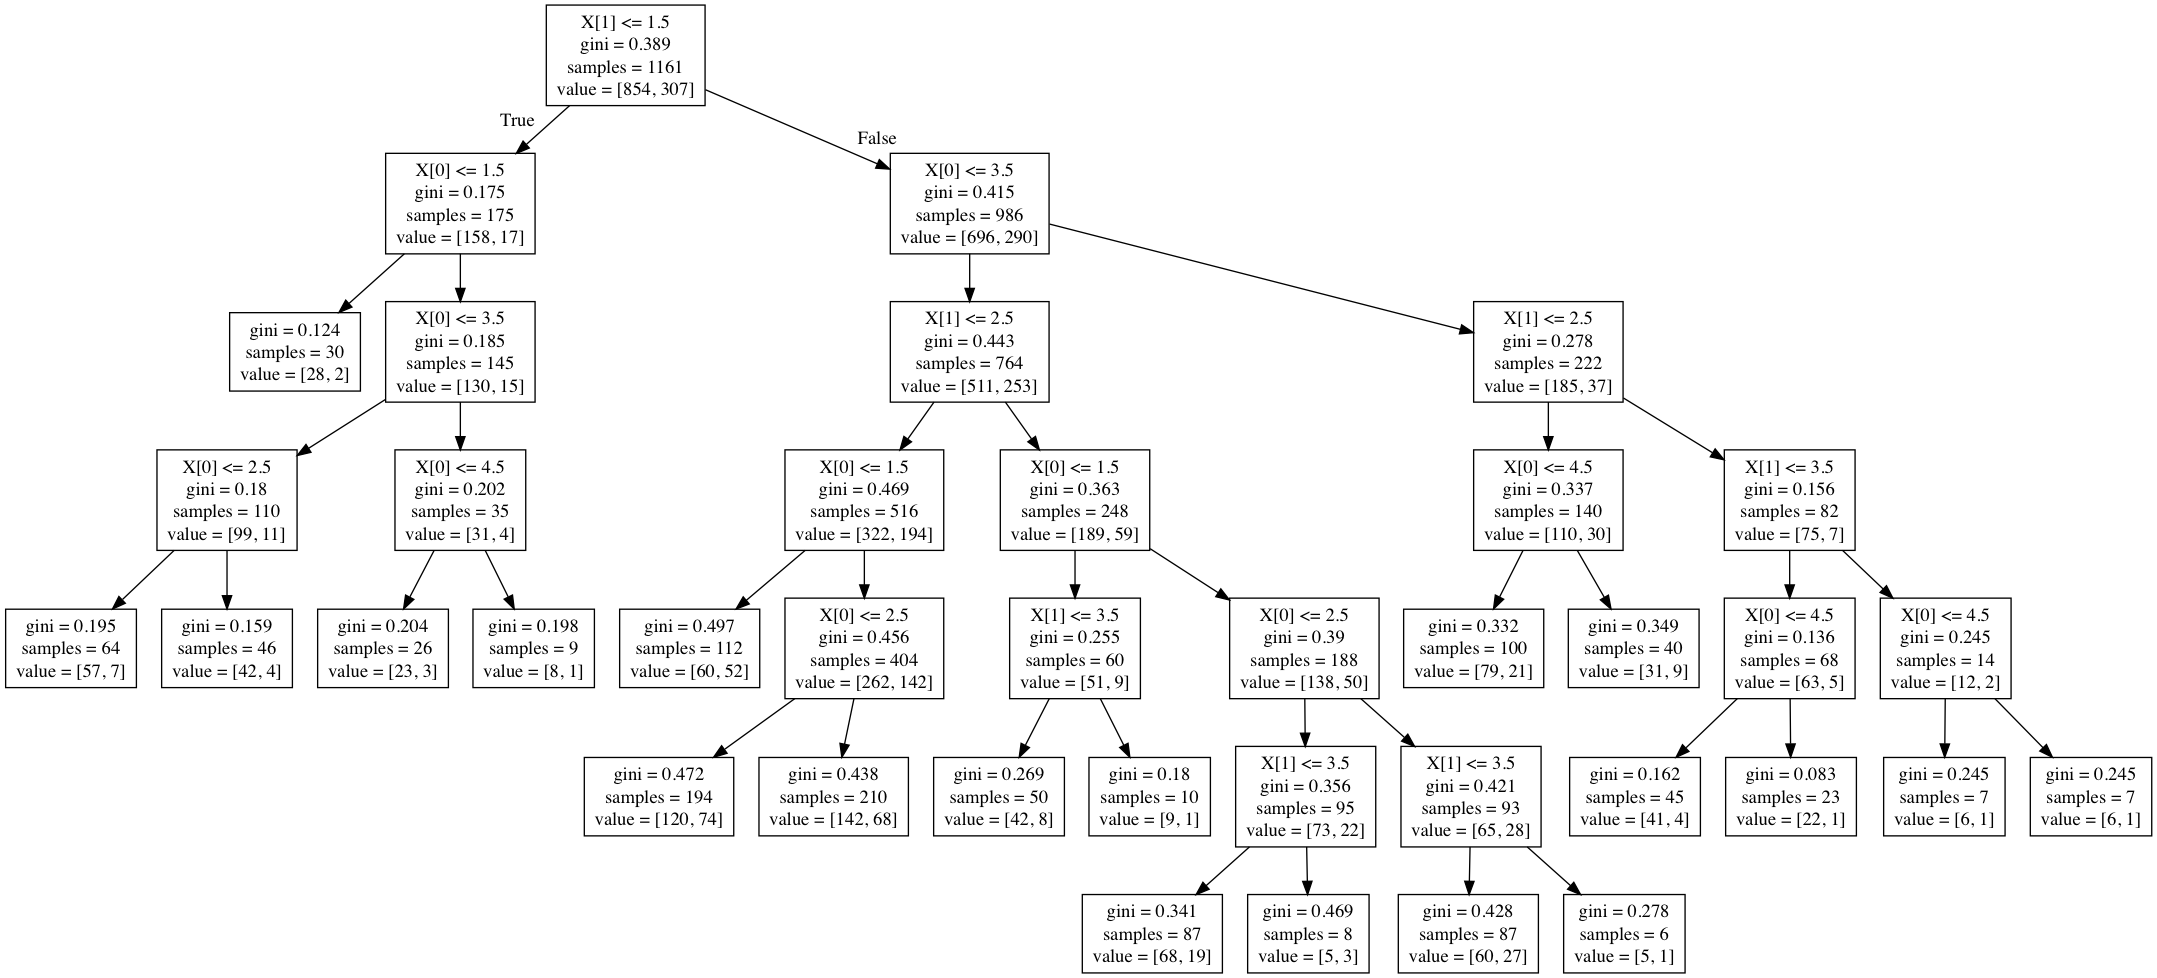

In [36]:
# Classification
# Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO

from io import StringIO
#from StringIO import StringIO 

from IPython.display import Image
out = StringIO()

# This is the code to export the decision tree image in the folder where the notebook is lockated : out_file = None
image_tree = tree.export_graphviz(classifier, out_file = None)
graph = graphviz.Source(image_tree)
graph.render("decision tree for the assignment")

# This is the code to have the decision tree image in the notebook :
tree.export_graphviz(classifier, out_file=out)

import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

A decision tree analysis was performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable (**US economy's situation**). All possible separations (categorical) or cut points (quantitative) are tested. For the present analysis, the entropy “goodness of split” criterion was used to grow the tree and a cost complexity algorithm was used for pruning the full tree into a final subtree.

The following explanatory variables were included as possible contributors to a classification tree model evaluating the US economy's situation (my response variable), the predictors are the interest in politics and self identification to a political party's philosophy. In the decision tree, X[0] is our first explanatory variable (interest in politics) and X[1], our second explanatory variable (political afiliation).

The political afficilation was the first variable to separate the sample into two subgroups. At the top we see the most informative condition is Poltical affiliation <= 1.5. If this condition is true, we take the left branch to get to the 183 samples of value = [170; 13]. This means there are 170 examples of those who identify as "democrats" are interested in politics.
The total model classified 75.96% of the sample correctly.